In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [109]:
fall = pd.read_csv('data/falling/falling_data.csv')
normal = pd.read_csv('walking_data.csv')

In [110]:
fall.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
0,-6.64,7.13,0.28,-0.27,-0.12,0.41
1,-7.21,7.42,-0.06,-0.22,0.05,0.30
2,-5.93,7.05,-0.04,-0.27,-0.14,0.14
3,-4.57,9.48,1.50,-0.37,-0.74,1.04
4,-4.56,9.07,1.82,-0.60,-0.66,1.09


In [111]:
normal.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
0,-3.03,7.99,3.62,-0.32,0.22,0.21
1,-3.73,7.26,3.52,-0.10,-0.91,-0.37
2,-2.29,8.00,4.89,0.29,-0.46,-0.32
3,-2.16,6.98,3.71,0.24,-0.52,-0.29
4,-1.48,9.35,3.77,0.03,-0.41,-0.13


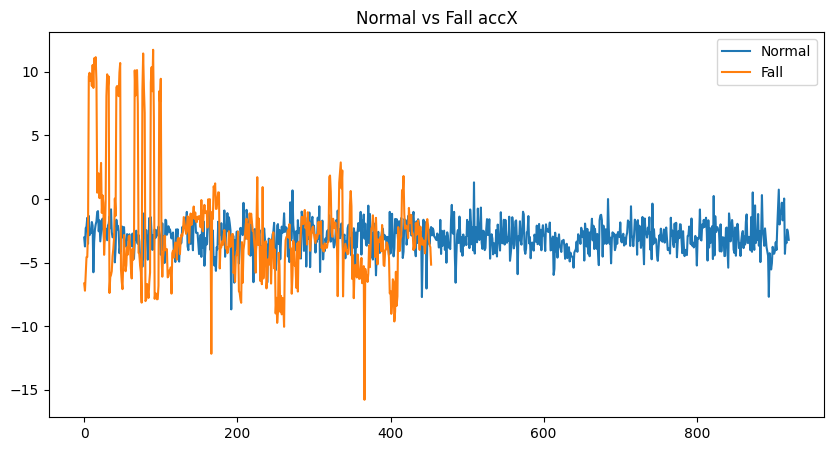

In [112]:
# Visualize the data for comparison normal data and fall data with accX
plt.figure(figsize=(10, 5))
plt.plot(normal['AccX'], label='Normal')
plt.plot(fall['AccX'], label='Fall')
plt.title('Normal vs Fall accX')
plt.legend()

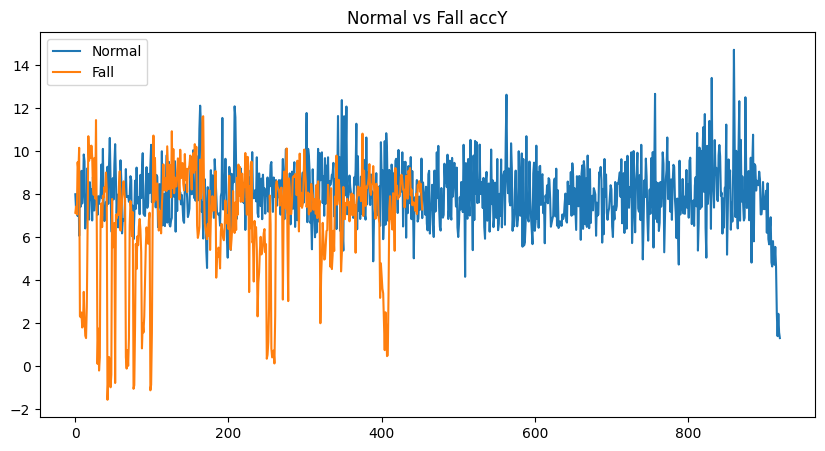

In [113]:
# Visualize the data for comparison normal data and fall data with accY
plt.figure(figsize=(10, 5))
plt.plot(normal['AccY'], label='Normal')
plt.plot(fall['AccY'], label='Fall')
plt.title('Normal vs Fall accY')
plt.legend()

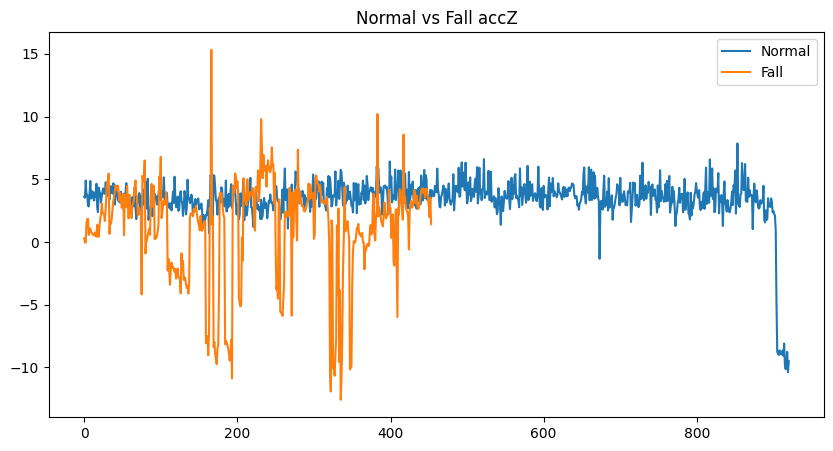

In [114]:
# Visualize the data for comparison normal data and fall data with accZ
plt.figure(figsize=(10, 5))
plt.plot(normal['AccZ'], label='Normal')
plt.plot(fall['AccZ'], label='Fall')
plt.title('Normal vs Fall accZ')
plt.legend()

In [115]:
print(normal.describe())
print(fall.describe())

             AccX        AccY        AccZ       GyroX       GyroY       GyroZ
count  921.000000  921.000000  921.000000  921.000000  921.000000  921.000000
mean    -2.992986    7.987220    3.408773   -0.044886    0.002693   -0.070717
std      1.165458    1.439366    1.937971    0.419860    0.524379    0.400893
min     -8.680000    1.300000  -10.380000   -2.440000   -2.960000   -2.040000
25%     -3.710000    7.040000    3.010000   -0.250000   -0.270000   -0.290000
50%     -2.950000    7.880000    3.560000   -0.020000    0.010000   -0.060000
75%     -2.290000    8.890000    4.160000    0.170000    0.290000    0.150000
max      1.310000   14.710000    7.850000    1.390000    2.280000    1.220000
             AccX        AccY        AccZ       GyroX       GyroY       GyroZ
count  454.000000  454.000000  454.000000  454.000000  454.000000  454.000000
mean    -2.573987    6.770264    1.128238   -0.074846   -0.071784   -0.000617
std      4.324963    2.608595    4.018474    0.527305    0.71949

In [116]:
window_size = 10
fall_data_filtered = fall.rolling(window=window_size).mean().dropna()

In [117]:
len(fall_data_filtered)

445

In [118]:
fall_data_filtered

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
9,0.718,5.917,0.878,-0.292,-0.220,0.498
10,2.271,5.393,0.921,-0.263,-0.219,0.466
11,4.046,4.996,0.987,-0.250,-0.214,0.465
12,5.513,4.507,1.050,-0.222,-0.215,0.459
13,7.077,3.700,0.951,-0.217,-0.191,0.383
...,...,...,...,...,...,...
449,-3.000,7.786,3.995,-0.030,-0.036,-0.027
450,-2.963,7.849,3.876,0.019,0.034,-0.020
451,-3.016,7.935,3.647,0.031,0.130,0.049
452,-3.035,7.965,3.607,0.046,0.192,0.087


In [119]:
window_size = 10
normal_data_filtered = normal.rolling(window=window_size).mean().dropna()

In [120]:
normal_data_filtered

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
9,-2.565,7.842,3.743,-0.144,-0.138,0.002
10,-2.443,7.845,3.783,-0.107,-0.162,-0.010
11,-2.280,8.103,3.834,-0.080,-0.090,0.013
12,-2.627,8.255,3.695,-0.200,-0.015,0.072
13,-2.747,8.197,3.654,-0.268,0.084,0.138
...,...,...,...,...,...,...
916,-1.380,5.099,-9.017,-0.058,0.085,-0.404
917,-1.801,4.594,-9.067,-0.107,0.124,-0.449
918,-1.841,4.145,-9.079,-0.091,0.080,-0.496
919,-2.002,3.819,-9.231,-0.080,0.056,-0.514


In [121]:
normal_data_filtered['label'] = 0
fall_data_filtered['label'] = 1

# Combine the data and shuffle
combined_data = pd.concat([normal_data_filtered, fall_data_filtered])
combined_data = combined_data.sample(frac=1).reset_index(drop=True)

combined_data.head()
combined_data.to_csv('combined_data.csv', index=False)

In [122]:
# Prepare the data for training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

X = combined_data.drop('label', axis=1)
y = combined_data['label']

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/Users/cngvng/anaconda3/envs/askme/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/cngvng/anaconda3/envs/askme/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/cngvng/anaconda3/envs/askme/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/cngvng/anaconda3/envs/askme/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be rem

In [123]:
# Import the logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/cngvng/anaconda3/envs/askme/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/cngvng/anaconda3/envs/askme/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


LogisticRegression()

In [124]:
# Test the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

/Users/cngvng/anaconda3/envs/askme/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/cngvng/anaconda3/envs/askme/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/cngvng/anaconda3/envs/askme/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/cngvng/anaconda3/envs/askme/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

In [125]:
accuracy

0.8492647058823529

In [35]:
# Save the model to a file
import pickle
filename = 'logistic_model_d.pkl'
pickle.dump(model, open(filename, 'wb'))

In [40]:
# Load the model from a file
loaded_model = pickle.load(open(filename, 'rb'))

In [126]:
walking_data = pd.read_csv('fall.csv')

In [127]:
model.predict(walking_data)

/Users/cngvng/anaconda3/envs/askme/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/cngvng/anaconda3/envs/askme/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/cngvng/anaconda3/envs/askme/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/cngvng/anaconda3/envs/askme/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [128]:
loaded_model.predict(X_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [42]:
# After the predict label, transfer 1 to fall, 0 to normal

prediction = loaded_model.predict(X_test)

In [43]:
prediction

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1])

In [44]:
prediction = np.where(prediction == 1, 'fall', 'normal')
prediction

array(['fall', 'normal', 'fall', 'normal', 'normal', 'fall', 'normal',
       'normal', 'fall', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'fall', 'normal', 'normal', 'normal', 'normal', 'fall',
       'normal', 'normal', 'normal', 'normal', 'fall', 'fall', 'normal',
       'fall', 'normal', 'fall', 'normal', 'normal', 'normal', 'normal',
       'fall', 'normal', 'normal', 'normal', 'fall', 'fall', 'normal',
       'normal', 'fall', 'normal', 'normal', 'fall', 'fall', 'fall',
       'fall', 'normal', 'fall', 'fall', 'normal', 'fall', 'normal',
       'normal', 'normal', 'normal', 'fall', 'fall', 'normal', 'fall',
       'normal', 'normal', 'normal', 'normal', 'normal', 'fall', 'normal',
       'fall', 'normal', 'normal', 'fall', 'normal', 'normal', 'normal',
       'normal', 'fall', 'normal', 'normal', 'fall', 'fall', 'fall',
       'fall', 'fall', 'fall', 'normal', 'normal', 'fall', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'fall', 'nor

In [45]:
fall

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
0,3.59,-7.43,-6.09,0.00,-0.02,-0.04
1,3.81,-8.00,-6.47,0.04,-0.08,0.01
2,3.51,-7.36,-6.58,-0.26,-0.04,0.09
3,3.54,-6.94,-6.92,-0.23,-0.05,0.13
4,3.51,-8.05,-6.32,-0.52,0.79,0.62
...,...,...,...,...,...,...
574,7.63,-5.28,-4.92,0.10,0.13,-0.05
575,8.04,-5.53,-4.26,-0.21,-0.06,0.10
576,8.22,-5.49,-4.37,0.05,-0.09,-0.15
577,8.66,-4.26,-4.39,0.16,-0.20,-0.40


In [52]:
prediction = loaded_model.predict(normal[200:240])

/Users/cngvng/anaconda3/envs/askme/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/cngvng/anaconda3/envs/askme/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/cngvng/anaconda3/envs/askme/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/cngvng/anaconda3/envs/askme/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or

In [53]:
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])